# Linear Regression

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pandas_profiling import ProfileReport

## In This Model we just handle the Numerical Data 

In [7]:
df = pd.read_csv('AI4I.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
x = df.iloc[: , 4:]
y = df["Air temperature [K]"]

In [5]:
print(x.head())
print(y[:5])

   Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  \
0                    308.6                    1551         42.8   
1                    308.7                    1408         46.3   
2                    308.5                    1498         49.4   
3                    308.6                    1433         39.5   
4                    308.7                    1408         40.0   

   Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0                0                0    0    0    0    0    0  
1                3                0    0    0    0    0    0  
2                5                0    0    0    0    0    0  
3                7                0    0    0    0    0    0  
4                9                0    0    0    0    0    0  
0    298.1
1    298.2
2    298.1
3    298.2
4    298.2
Name: Air temperature [K], dtype: float64


In [6]:
x.shape

(10000, 10)

## Now we Process our data

In [7]:
x.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0,0


In [8]:
pf = ProfileReport(df)

In [9]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Save our Visualization

In [10]:
pf.to_file("report.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Now we Process Training data

## So there is No Null Values

## Now we Scale the Value

In [10]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [11]:
train_scale = scalar.fit_transform(x)
train_scale

array([[-0.94735989,  0.06818514,  0.28219976, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [-0.879959  , -0.72947151,  0.63330802, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [-1.01476077, -0.22744984,  0.94428963, ..., -0.09793424,
        -0.09948362, -0.04363046],
       ...,
       [-0.94735989,  0.59251888, -0.66077672, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [-0.879959  , -0.72947151,  0.85400464, ..., -0.09793424,
        -0.09948362, -0.04363046],
       [-0.879959  , -0.2162938 ,  0.02137647, ..., -0.09793424,
        -0.09948362, -0.04363046]])

In [12]:
x_scale = pd.DataFrame(train_scale , columns= x.columns)
x_scale.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,-0.947360,0.068185,0.282200,-1.695984,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
1,-0.879959,-0.729472,0.633308,-1.648852,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
2,-1.014761,-0.227450,0.944290,-1.617430,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
3,-0.947360,-0.590021,-0.048845,-1.586009,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
4,-0.879959,-0.729472,0.001313,-1.554588,-0.187322,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


## Correlation

<AxesSubplot:>

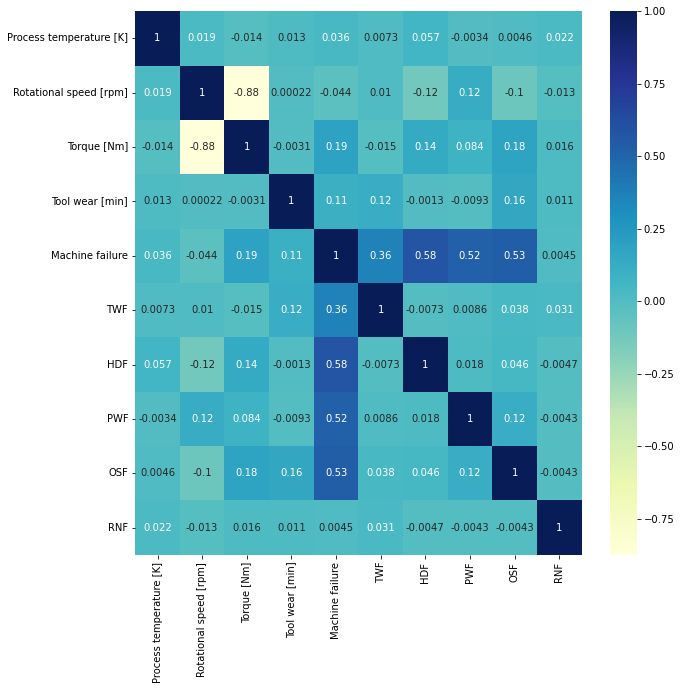

In [13]:
## See the Correlation 
plt.figure(figsize=(10,10))
sns.heatmap(x_scale.corr(), cmap="YlGnBu", annot=True)

Here we see some of them are correlated but we also check this using VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
train_scale[:2]

array([[-0.94735989,  0.06818514,  0.28219976, -1.69598374, -0.18732201,
        -0.06797983, -0.10786004, -0.09793424, -0.09948362, -0.04363046],
       [-0.879959  , -0.72947151,  0.63330802, -1.6488517 , -0.18732201,
        -0.06797983, -0.10786004, -0.09793424, -0.09948362, -0.04363046]])

In [16]:
## We always Gives our scaling array not our dataframe
train_scale.shape

(10000, 10)

In [17]:
vif_df = pd.DataFrame()
vif_df["VIF Score"] = [variance_inflation_factor(train_scale,i)for i in range(train_scale.shape[1])]
vif_df["Feature Names"] =x.columns
vif_df ## everything is lesser than 10 so we dont drop any column 

,VIF Score,Feature Names
0,1.004799,Process temperature [K]
1,5.171592,Rotational speed [rpm]
2,5.236156,Torque [Nm]
3,1.039958,Tool wear [min]
4,11.829612,Machine failure
5,2.433058,TWF
6,4.597022,HDF
7,3.623946,PWF
8,3.347600,OSF
9,1.002015,RNF


Now we remove the Machine Failure in X_train and test

## Drop the MultiCollinearity Column

In [18]:
x_scale.drop(["Machine failure"] , axis = 1 , inplace=True)

In [20]:
x_scale.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,-0.947360,0.068185,0.282200,-1.695984,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
1,-0.879959,-0.729472,0.633308,-1.648852,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
2,-1.014761,-0.227450,0.944290,-1.617430,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
3,-0.947360,-0.590021,-0.048845,-1.586009,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
4,-0.879959,-0.729472,0.001313,-1.554588,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


In [35]:
X = x.copy()
X.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0,0


## Save our Scalar Model

In [36]:
X.drop(["Machine failure"], axis=1 , inplace=True)

In [39]:
X.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,308.6,1551,42.8,0,0,0,0,0,0
1,308.7,1408,46.3,3,0,0,0,0,0
2,308.5,1498,49.4,5,0,0,0,0,0
3,308.6,1433,39.5,7,0,0,0,0,0
4,308.7,1408,40.0,9,0,0,0,0,0


In [40]:
import pickle
scalar = StandardScaler()
scalar.fit_transform(X)
pickle.dump(scalar , open("Scalar_Model.pickle","wb")) 

## Split train and Test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.20, random_state=4)

In [25]:
len(X_train) , len(X_test)

(8000, 2000)

In [26]:
X_train.head()

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
4983,2.085680,1.841995,-1.423183,1.618970,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
6789,0.333257,0.598097,-0.931632,-0.501972,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
2221,-0.677756,-0.930280,2.047773,0.644908,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
6043,0.602860,-0.394790,0.181883,0.063613,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
1564,-1.216963,3.074737,-2.105336,0.550644,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


##  Build the Model

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train , y_train)

LinearRegression()

### predict our model

In [30]:
X_test.head(2)

,Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
1603,-1.486567,0.464224,-0.791188,-1.413191,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363
8713,-0.947360,2.109740,-1.593722,-0.847607,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363


In [41]:
scale = pickle.load(open('Scalar_Model.pickle' , 'rb'))
scale.transform([[311.8 , 1421 , 44.8 ,101 , 0 , 0 , 0 , 0 ,0]])

array([[ 1.20946845, -0.65695726,  0.48283305, -0.10920494, -0.06797983,
        -0.10786004, -0.09793424, -0.09948362, -0.04363046]])

In [42]:
lr.predict([[ 1.20946845, -0.65695726,  0.48283305, -0.10920494, -0.06797983,
        -0.10786004, -0.09793424, -0.09948362, -0.04363046]])

array([302.07600581])

In [43]:
y_test[1:2]

4684    303.6
Name: Air temperature [K], dtype: float64

**Now we see the actual value is 303 and it predict 302 so it is almost close** 

In [44]:
lr.score(X_test , y_test)

0.765955306242505

In [45]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [46]:
adj_r2(X_test , y_test)

0.764896812652647

In [70]:
linear_score =lr.score(X_test , y_test)
linear_score

0.765955306242505

In [47]:
## train data
lr.score(X_train , y_train)

0.7779759987160282

## Now we use Regularization

### Lasso

In [49]:
from sklearn.linear_model import Lasso , LassoCV , Ridge , RidgeCV , ElasticNet , ElasticNetCV

In [50]:
lassocv = LassoCV(alphas=None , cv=200 , max_iter=20000000 , normalize=True )
lassocv

LassoCV(cv=200, max_iter=20000000, normalize=True)

In [51]:
lassocv.fit(X_train , y_train)

LassoCV(cv=200, max_iter=20000000, normalize=True)

In [52]:
lassocv.alpha_     ##alpha value

3.956370970237258e-05

In [53]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train , y_train)

Lasso(alpha=3.956370970237258e-05)

In [54]:
lasso.score(X_test , y_test) 

0.7659562090479132

In [55]:
lassoscore = lasso.score(X_test , y_test)
lassoscore

0.7659562090479132

### Ridge

In [56]:
alpha = np.random.uniform(0 , 10 ,100)

In [57]:
ridgecv = RidgeCV( alphas=alpha , cv = 10 , normalize=True) 
ridgecv

RidgeCV(alphas=array([3.96975782, 7.73694626, 3.87994483, 4.09988663, 6.99365915,
       7.06928752, 0.93099634, 9.37614526, 4.62269359, 8.72005055,
       0.26048834, 9.41783559, 7.3425876 , 7.62732402, 8.59241833,
       7.11686434, 1.52243385, 0.10766731, 2.76767686, 7.06841336,
       4.19281564, 1.00773206, 4.72058177, 6.67375557, 9.1808161 ,
       7.92178586, 7.2445446 , 7.43455073, 2.87866023, 6.56758657,
       1...
       6.8878662 , 6.06698443, 2.46433792, 5.51868161, 3.26213434,
       4.7551147 , 0.26841009, 6.02500936, 5.94140543, 8.00269131,
       9.71895135, 2.27579273, 8.15370331, 5.25366098, 9.06347043,
       5.17954545, 0.94625478, 3.93308432, 6.39746268, 2.39288026,
       0.78628443, 9.83165242, 5.58260323, 3.48929203, 6.15410166,
       9.92707289, 0.74425983, 9.2992305 , 1.03508364, 6.19027732]),
        cv=10, normalize=True)

In [58]:
ridgecv.fit(X_train , y_train)
ridgecv.alpha_

0.10766731212384029

In [59]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train , y_train)

Ridge(alpha=0.10766731212384029)

In [60]:
ridge_score = ridge.score(X_test , y_test)
ridge_score

0.7659554799536415

In [61]:
## train data
ridge.score(X_train , y_train)

0.7779759985795137

## ElasticNet

In [62]:
elastic = ElasticNetCV(alphas=None , cv = 10 , normalize=True)
elastic

ElasticNetCV(cv=10, normalize=True)

In [63]:
elastic.fit(X_train , y_train)

ElasticNetCV(cv=10, normalize=True)

In [64]:
elastic.alpha_ , elastic.l1_ratio

(3.938190309622069e-05, 0.5)

In [65]:
elas = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio)
elas

ElasticNet(alpha=3.938190309622069e-05)

In [66]:
elas.fit(X_train , y_train)

ElasticNet(alpha=3.938190309622069e-05)

In [67]:
elastic_score = elas.score(X_test , y_test)
elastic_score

0.7659559986803643

In [68]:
## train Data
elas.score(X_train , y_train)

0.7779759972198134

**Now our Model is Stable Becozz It Gives Both training and testing data same value with all Regularization**

In [71]:
scores = {
    "LinearRegression" : linear_score , 
    "Lassoregression" : lassoscore ,
    "Ridgeregression" : ridge_score ,
    "ElasticRegression" : elastic_score
}
scores

{'LinearRegression': 0.765955306242505,
 'Lassoregression': 0.7659562090479132,
 'Ridgeregression': 0.7659554799536415,
 'ElasticRegression': 0.7659559986803643}

In [72]:
Keymax = max(zip(scores.values() , scores.keys()))
print(Keymax)

(0.7659562090479132, 'Lassoregression')


## so we save our Lasso Model

In [73]:
pickle.dump( lasso , open("LassoModel.pickle" , "wb"))